In [80]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from LeastSquarewithReg import LSReg as LSR
from LeastSquare import LeastSquare as LS
from LinearRegression import LinearRegression as LR

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [81]:
n_res = 10000
f = lambda x: np.sin(np.pi*x)
x = np.linspace(-1, 1, n_res)
y = f(x)

In [82]:
num_model = 500
num_sample = 2

In [83]:
reg_weights = []
for i in range(num_model):
    x_sample = np.random.choice(x, num_sample)
    y_sample = f(x_sample)
    x_ = np.array([[1, i] for i in x_sample])
    weights = LSR(x_, y_sample, 0.1).parameters
    reg_weights.append(weights)
non_reg_weights = []
for i in range(num_model):
    x_sample = np.random.choice(x, num_sample)
    y_sample = f(x_sample)
    x_ = np.array([[1, i] for i in x_sample])
    weights = LS(x_, y_sample).parameters
    non_reg_weights.append(weights)

In [84]:
mean_w_reg  = np.mean(reg_weights, axis=0)
mean_w_reg = np.round(mean_w_reg, 4)

In [85]:
mean_w  = np.mean(non_reg_weights, axis=0)
mean_w = np.round(mean_w, 4)

In [86]:
x_aug = np.array([[1, i] for i in x])

In [87]:
reg_bias = bv.cal_bias(mean_w_reg.dot(x_aug.T), y)
nonreg_bias = bv.cal_bias(mean_w.dot(x_aug.T), y)
reg_var = bv.cal_variance(np.array([i.dot(x_aug.T) for i in reg_weights]), mean_w_reg.dot(x_aug.T))
nonreg_var = bv.cal_variance(np.array([i.dot(x_aug.T) for i in non_reg_weights]), mean_w.dot(x_aug.T))

In [88]:
print(f'mean weight without reg: {mean_w}')
print(f'mean weight with reg: {mean_w_reg}')
print(f'bias without reg: {nonreg_bias}')
print(f'bias with reg: {reg_bias}')
print(f'variance without reg: {nonreg_var}')
print(f'variance with reg: {reg_var}')

mean weight without reg: [-0.0378  0.8414]
mean weight with reg: [-0.0535  0.5526]
bias without reg: 0.20181
bias with reg: 0.25286
variance without reg: 1.52548
variance with reg: 0.50679


c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':


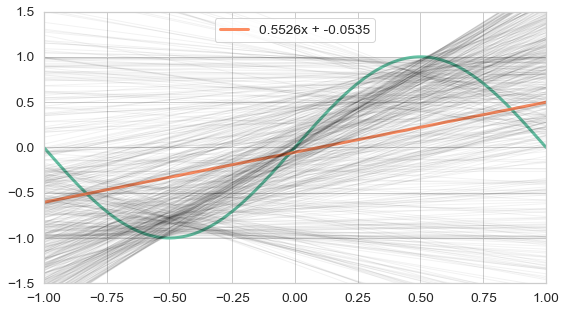

In [89]:
fig = plt.figure(figsize=(9, 5))
plt.plot(x, y)
plt.plot(x, mean_w_reg.dot(np.array([[1, i] for i in x]).T), label=f'{mean_w_reg[1]}x + {mean_w_reg[0]}')
for w in reg_weights:
    l = np.array([[1, i] for i in x]).dot(w.T)
    plt.plot(x, l, 'k', alpha=0.05, linewidth=1)
plt.axis([-1, 1, -1.5, 1.5])
plt.legend()
plt.savefig('03-reg-sin.png', dpi=150)

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':


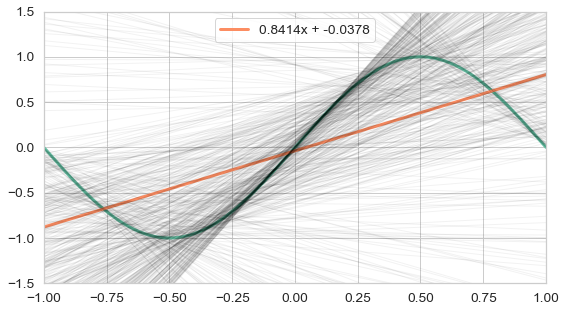

In [90]:
fig = plt.figure(figsize=(9, 5))
plt.plot(x, y)
plt.plot(x, mean_w.dot(np.array([[1, i] for i in x]).T), label=f'{mean_w[1]}x + {mean_w[0]}')
for w in non_reg_weights:
    l = np.array([[1, i] for i in x]).dot(w.T)
    plt.plot(x, l, 'k', alpha=0.05, linewidth=1)
plt.axis([-1, 1, -1.5, 1.5])
plt.legend()
plt.savefig('03-non-reg-sin.png', dpi=150)